# 작업준비
* 데이터 수집 : https://www.kaggle.com/competitions/bike-sharing-demand/data

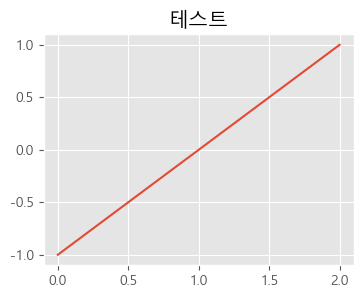

In [1]:
# 라이브러리 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# 한글폰트 설정
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False

pd.Series([-1,0,1]).plot(figsize=(4,3), title='테스트')
plt.show()

# 데이터 불러오기
* **`pd.read_csv(csv파일 경로, parse_dates=[datetime형식으로 불러올 컬럼])`**

* 속성 정보
    * `datetime` - 시간대별 데이터 제공. timestamp(날짜와 시간 결합) 형태
    * `season`  - 1 = spring, 2 = summer, 3 = fall, 4 = winter // 사실 1분기 2분기 3분기 4분기 임 (Kaggle에서 잘못 표기)
    * `holiday` - 공휴일(주말이 아닌 빨간날). 1-yes, 2-no
    * `workingday` - 주말, 공휴일을 제외한 날 1-yes, 2-no
    * `weather`
        * 1: Clear, Few clouds, Partly cloudy, Partly cloudy
        * 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
        * 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
        * 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
    * `temp` - 섭씨온도
    * `atemp` - 섭씨체감온도
    * `humidity` - 상대습도
    * `windspeed` - 풍속
    * `casual` - 비회원 대여량
    * `registered` - 회원 대여량
    * `count` - 총 대여량


- casual이랑 registered는 독립변수로 쓸 수 없다. 둘을 더한게 count(총 대여량)이기 때문이다.

In [2]:
# datetime 컬럼은 datetime 형식으로 읽어오도록 옵션 설정
df = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/main/BikeSharingDemand.csv', parse_dates=['datetime'])
# df = pd.read_csv('data/bike_sharing_demand.csv', parse_dates=['datetime'])
display(df.head(3))
display(df.tail(3))

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129
10885,2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88


In [3]:
# 데이터 정보
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


'''
datetime은 datetime형식의 시계열 데이터 -> 이용

'''

# 파생컬럼 추가

In [4]:
# 연, 월, 일, 시, 요일
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['hour'] = df['datetime'].dt.hour
df['dayofweek'] = df['datetime'].dt.dayofweek # 월요일:0, 일요일:6
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,5


# 데이터 탐색(EDA)
* 데이터의 품질 확인(값의 분포, 결측치, 이상치 등)
* 독립변수와 종속변수간의 관계를 중점적으로 탐색

## datetime

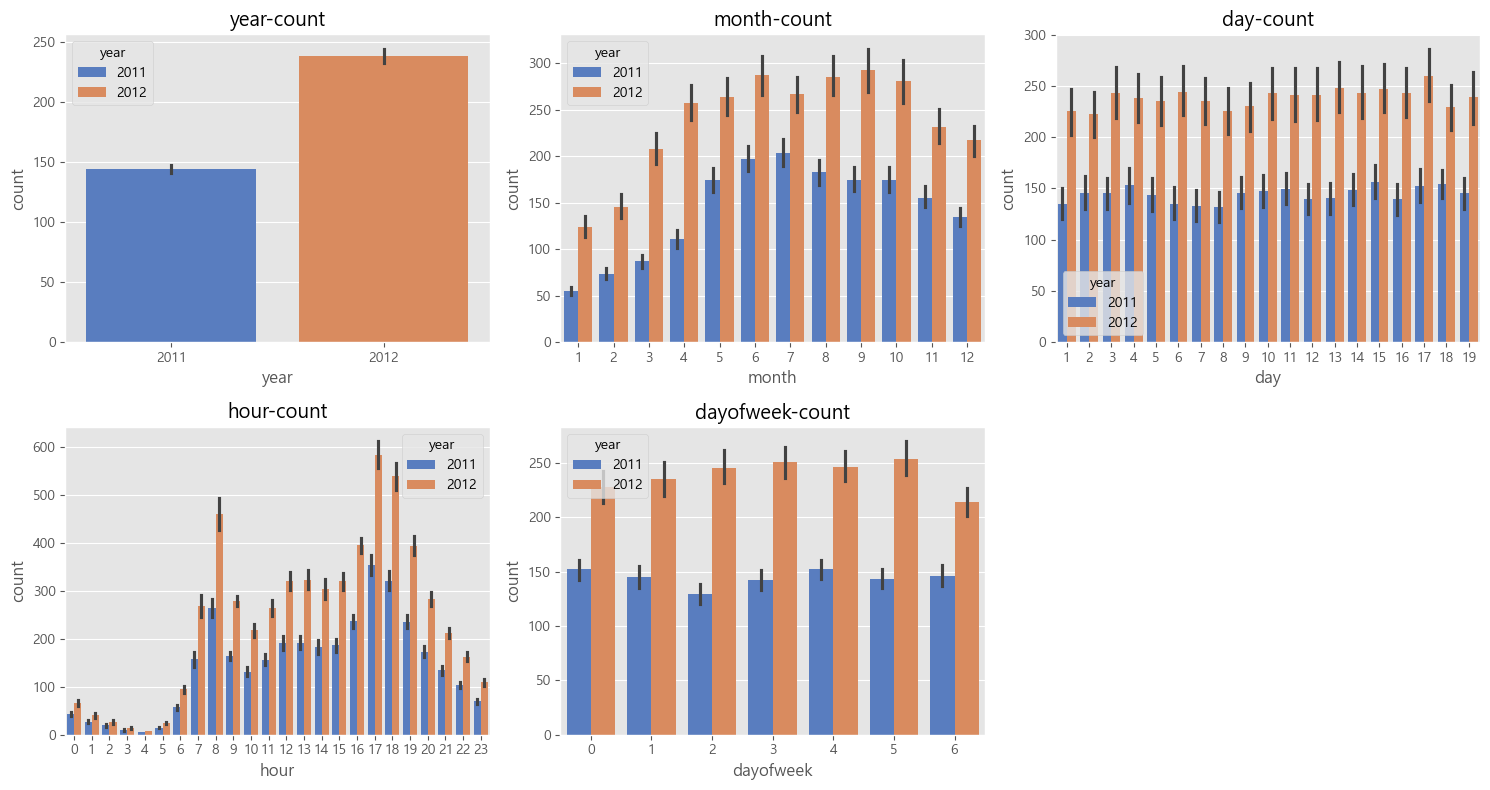

In [5]:
plt.figure(figsize=(15,8))

features = ['year','month','day','hour','dayofweek']

for i, feature in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.barplot(data=df, x=feature, y='count', estimator='mean', hue='year', palette='muted')
    plt.title(feature+'-count')

plt.tight_layout()

In [ ]:
"""
년도별 총대여량의 평균, 월별 총대여량의 평균, 일별 총대여량의 평균, ...
estimator를 따로 설정 안 해주면 기본적은로 mean(평균)을 구해줌
"""

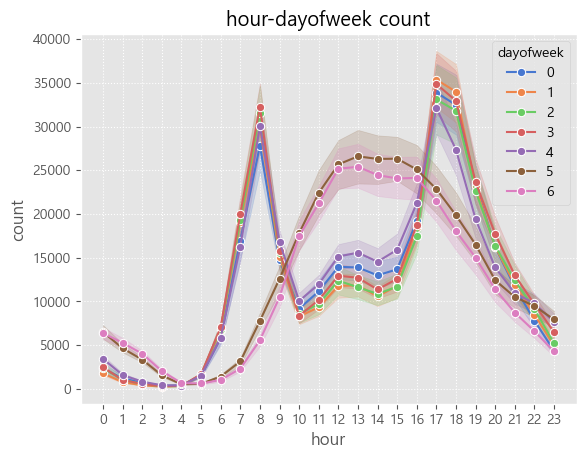

In [6]:
# 시간대 - 요일 별 대여량
sns.lineplot(data=df, x='hour', y='count', marker='o', hue='dayofweek', estimator='sum', palette='muted')
plt.title('hour-dayofweek count')
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## season
* 1 - 1,2,3월
* 2 - 4,5,6월
* 3 - 7,8,9월
* 4 - 10,11,12월

In [7]:
df[['month', 'season']].drop_duplicates()

,month,season
0,1,1
431,2,1
877,3,1
1323,4,2
1778,5,2
2234,6,2
2690,7,3
3146,8,3
3602,9,3
4055,10,4


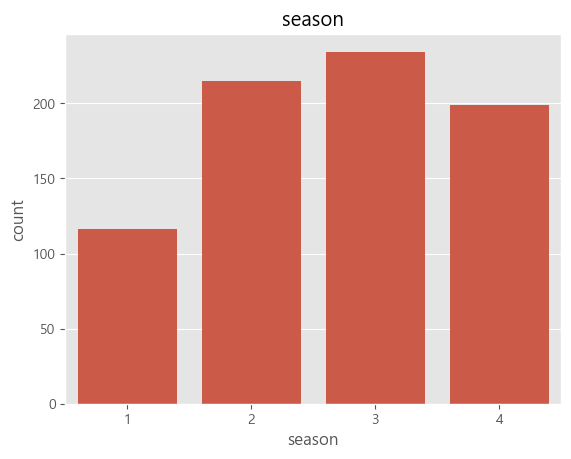

In [8]:
sns.barplot(data=df, x='season', y='count', errorbar=None)
plt.title('season')
plt.show()

<Axes: xlabel='month', ylabel='mean temp'>

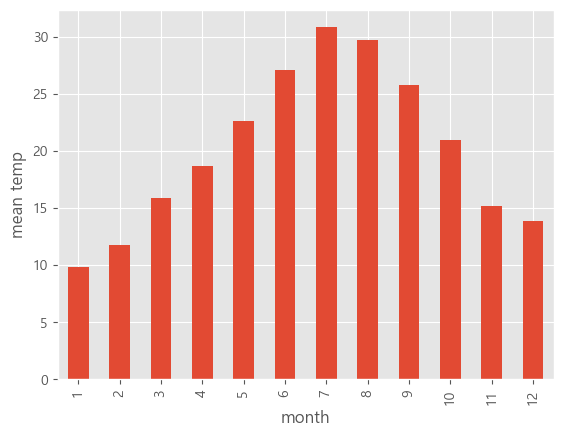

In [9]:
# 월별 평균 기온
df.groupby('month')['temp'].mean().plot.bar(ylabel='mean temp')

<Axes: xlabel='month', ylabel='mean temp'>

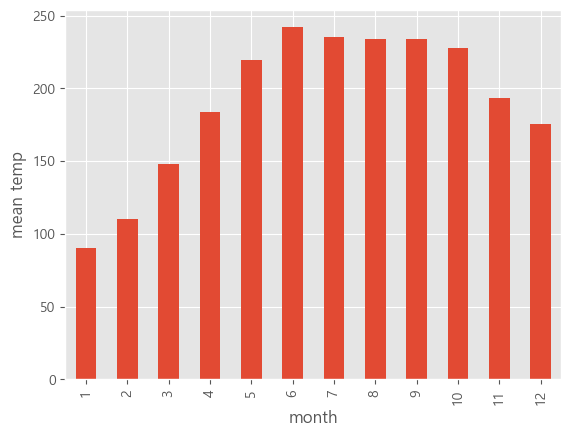

In [10]:
# 월별 평균 대여량
df.groupby('month')['count'].mean().plot.bar(ylabel='mean temp')

## holiday
* 공휴일(평일 중 빨간날)
* 토,일은 원래 쉬는 날로, holiday로 간주하지 않음
* 공휴일과 비공휴일의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

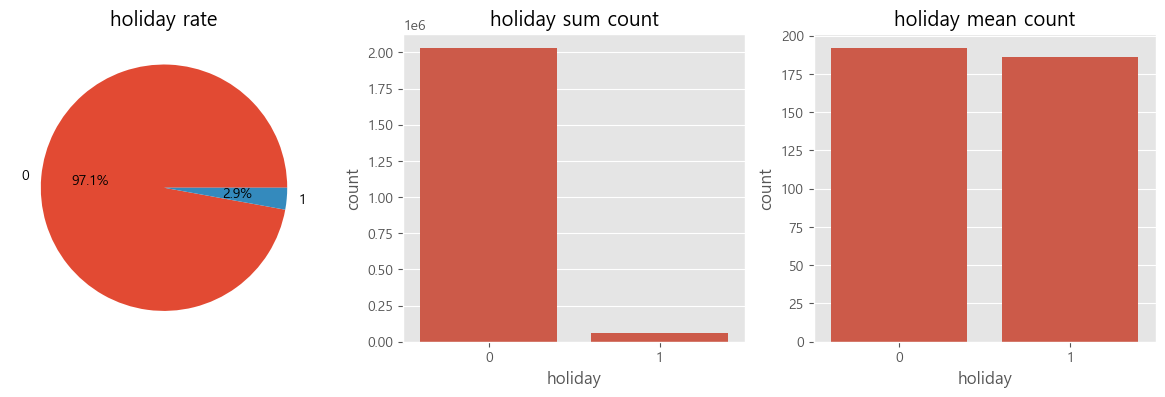

In [11]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['holiday'].value_counts(), autopct='%.1f%%', labels=['0','1'])
plt.title('holiday rate')

plt.subplot(132)
sns.barplot(data=df, x='holiday', y='count', errorbar=None, estimator='sum')
plt.title('holiday sum count')

plt.subplot(133)
sns.barplot(data=df, x='holiday', y='count', errorbar=None, estimator='mean')
plt.title('holiday mean count')

plt.show()

In [ ]:
"""
holiday count 자체가 너무 적기 때문에 그냥 sum으로 하면 holiday에 대여량이 적다고 분석할 수도 있어서 위험하다.
확인을 잘 해야 함.
평균으로 보면 비슷하다

"""

## workingday
* 평일 중 holiday를 제외한 날이 workingday
* workingday와 workingday의 날짜수의 차이가 있으므로, 평균 대여량으로 비교한다.

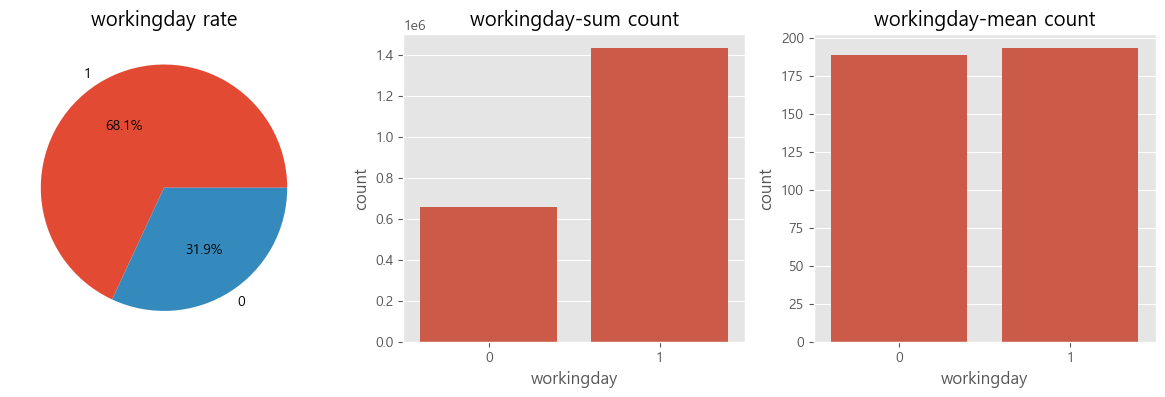

In [12]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['workingday'].value_counts(), autopct='%.1f%%', labels=['1','0'])
plt.title('workingday rate')

plt.subplot(132)
sns.barplot(data=df, x='workingday', y='count', errorbar=None, estimator='sum')
plt.title('workingday-sum count')

plt.subplot(133)
sns.barplot(data=df, x='workingday', y='count', errorbar=None, estimator='mean')
plt.title('workingday-mean count')

plt.show()

In [ ]:
"""
workingday 또한 기본 비율자체가 차이가 나기 때문에 sum으로 하면 안 된다. -> mean으로 ㄱㄱ
"""

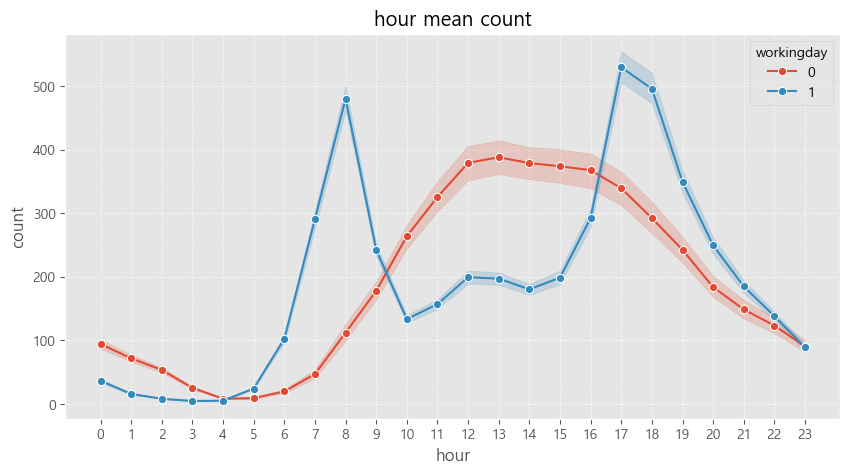

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='hour', y='count', marker='o', hue='workingday')
plt.title('hour mean count')
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## weather
* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mis
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clou
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow +    Fog
* weather가 4인 날은 단 하루밖에 없었음

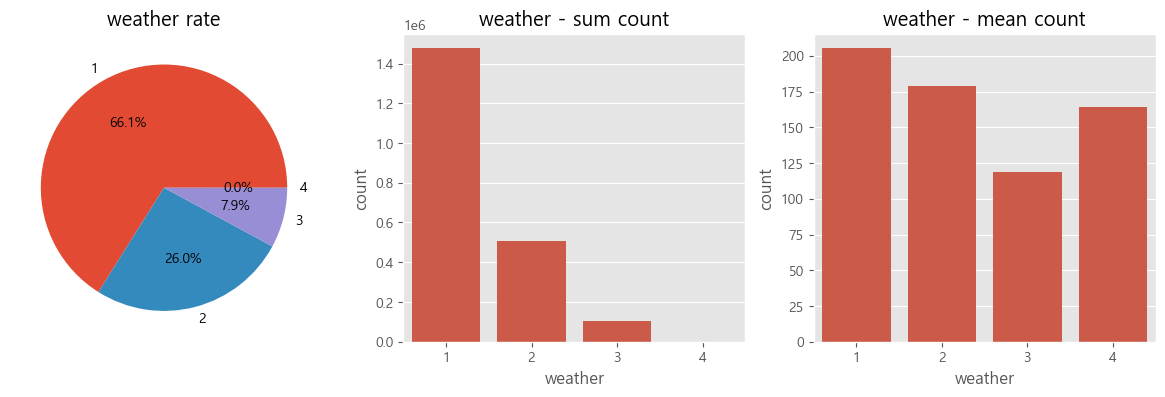

In [14]:
plt.figure(figsize=(15,4))

plt.subplot(131)
plt.pie(df['weather'].value_counts(), autopct='%.1f%%', labels=[1,2,3,4])
plt.title('weather rate')

plt.subplot(132)
sns.barplot(data=df, x='weather', y='count', errorbar=None, estimator='sum')
plt.title('weather - sum count')

plt.subplot(133)
sns.barplot(data=df, x='weather', y='count', errorbar=None, estimator='mean')
plt.title('weather - mean count')

plt.show()

In [ ]:
"""
4는 비바람치는 안 좋은 날씨이다. 근데 왜 대여량 평균이 높을까?
-> 4는 데이터가 딱 1개이다. 데이터가 너무 부족해서 평균을 내기엔 애매하다.
-> 저 높게 나온 데이터는 딱 그날 하루 특이하게 대여량이 많았던 것이라고 생각하는 게 더 자연스럽다.
-> 결론적으로 예측에 사용하기엔 데이터량이 너무 적기 때문에 부적절하다
"""

In [15]:
df['weather'].value_counts()

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64

## temp

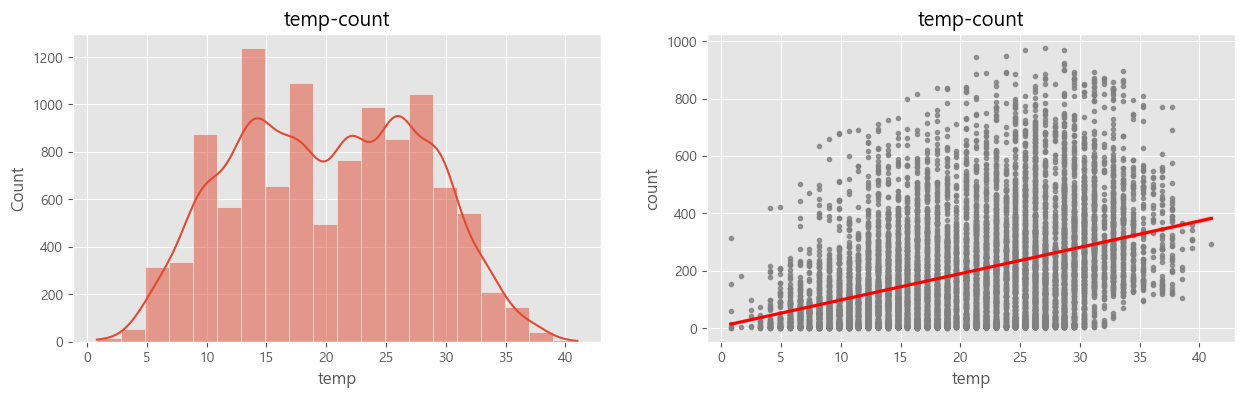

In [16]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['temp'], bins=20, kde=True)
plt.title('temp-count')

plt.subplot(122)
sns.regplot(data=df, x='temp', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('temp-count')

plt.show()

## atemp

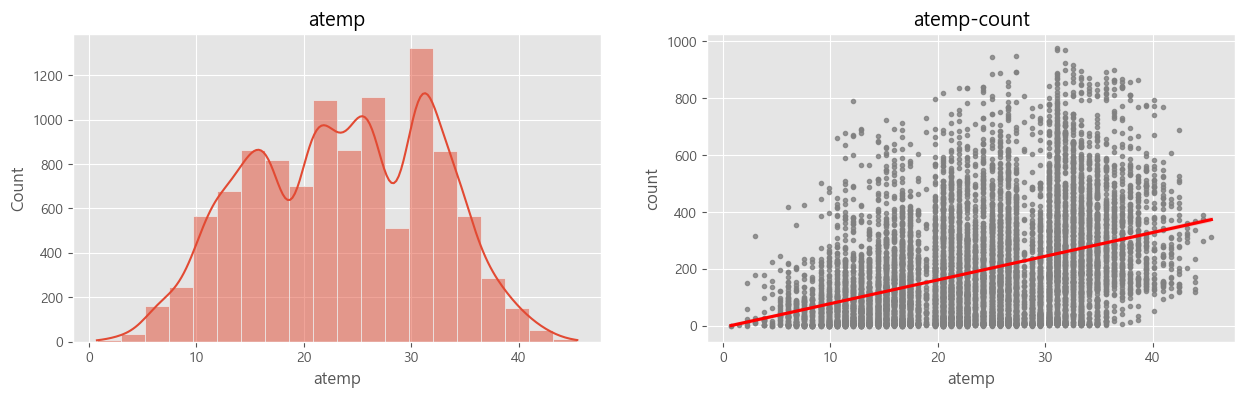

In [17]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['atemp'], bins=20, kde=True)
plt.title('atemp')


plt.subplot(122)
sns.regplot(data=df, x='atemp', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('atemp-count')

plt.show()

## humidity


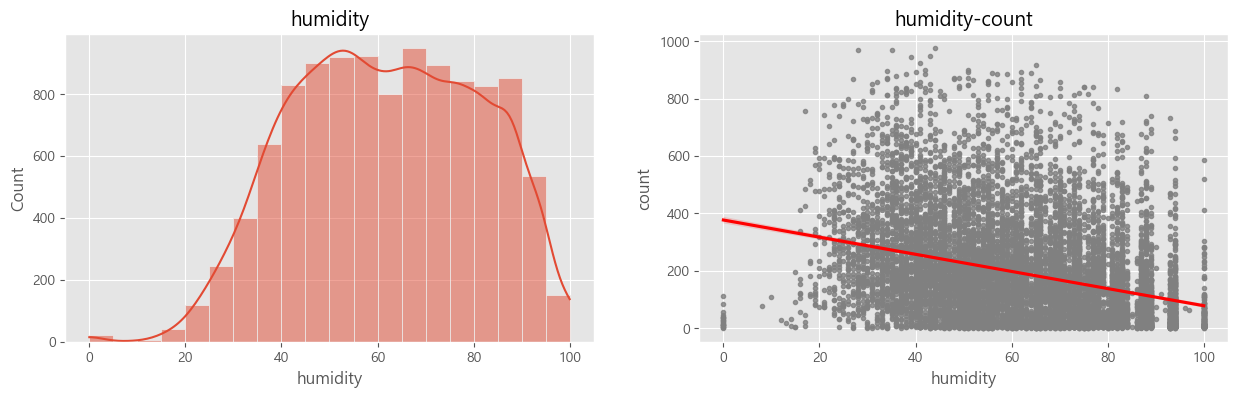

In [18]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['humidity'], bins=20, kde=True)
plt.title('humidity')

plt.subplot(122)
sns.regplot(data=df, x='humidity', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('humidity-count')

plt.show()

## windspeed
* value가 0인 데이터가 10% 이상
    * 풍속이 0인 경우는 없다고 보고, 해당 값은 결측이라고 본다.
* windspeed의 값이 0인 데이터들은 결측치가 0으로 채워진 상태인 것으로 파악
* feature engineering 필요

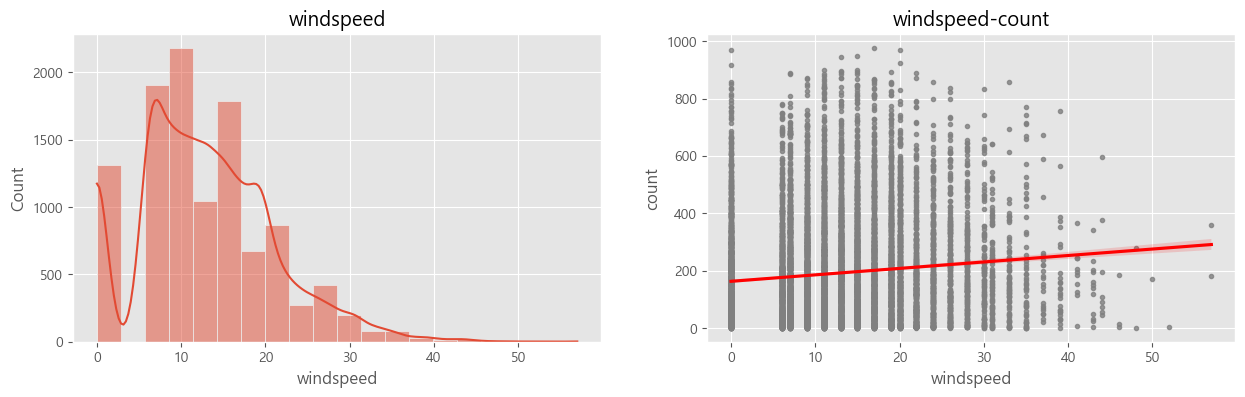

In [19]:
plt.figure(figsize=(15,4))

plt.subplot(121)
sns.histplot(df['windspeed'], bins=20, kde=True)
plt.title('windspeed')

plt.subplot(122)
sns.regplot(data=df, x='windspeed', y='count', color='gray', line_kws={'color':'red'}, marker='.')
plt.title('windspeed-count')

plt.show()

## casual, registered, count

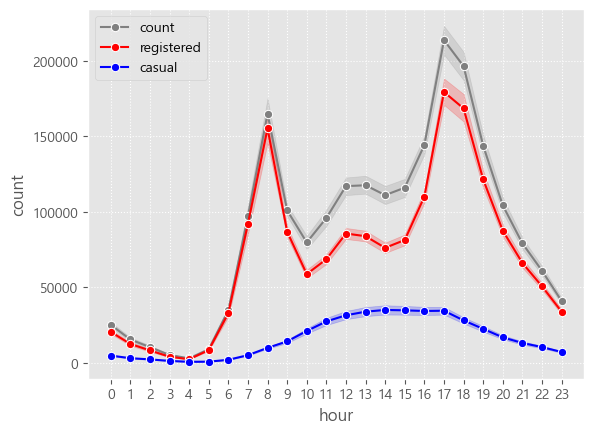

In [20]:
sns.lineplot(data=df, x='hour', y='count', color='gray', marker='o', estimator='sum', label='count')
sns.lineplot(data=df, x='hour', y='registered', color='red', marker='o', estimator='sum', label='registered')
sns.lineplot(data=df, x='hour', y='casual', color='blue', marker='o', estimator='sum', label='casual')
plt.legend()
plt.xticks(range(0,24))
plt.grid(ls=':')
plt.show()

## 상관계수
* 피어슨 상관계수
    * 두 변수 간의 선형 관계의 강도와 방향을 측정.
    * 파이썬에서 corr()함수를 이용하여 구할 수 있음.
    * +1과 -1 사이의 값을 가진다.
        * +1 : 완벽한 양의 선형 상관 관계
        * -1 : 완벽한 음의 상관관계
        * 0 : 선형 상관 관계 없음,
    
* 다중공선성
    * 독립변수 간 강한 상관관계가 있는 경우
    * 둘중 하나의 변수만 사용

<Axes: >

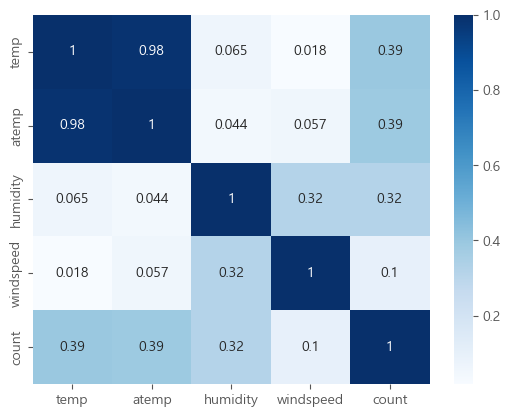

In [ ]:
# 상관관계 먼저 알아보기 # 상관있어 보이는 것 골라서...
corr = df[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(abs(corr), cmap='Blues', annot=True)
# 상관계수는 양이냐 음이냐가 중요하지 않아서 abs를 씌웠다(절댓값)

# LinearRegression

In [31]:
# 변수선택
"""
- casual, registered는 독립변수의 성격이 아니므로 선택하지 않음. 총 대여량에 포함되는 값(count)
- datetime은 선택하지 않음 -> 파생열로 나눠서 추가했음

=> 최종 선택 열
X: season, holiday, workingday, weather, temp, humidity, windspeed, year, month, day, hour, dayofweek
y: count
"""
X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1).copy() # [[]]
y = df['count']

In [32]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8164, 13) (2722, 13) (8164,) (2722,)


In [33]:
# 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression() # 모델 생성
model.fit(X_train, y_train) # 모델 훈련

LinearRegression()

In [35]:
# 테스트데이터로 예측
pred = model.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MAE\t: {mae}")
print(f"MSE\t: {mse}")
print(f"RMSE\t: {rmse}")
print(f"R2\t: {r2}")

MAE	: 105.50229321537446
MSE	: 20090.29853314087
RMSE	: 141.74025022251396
R2	: 0.38775297175891066


In [ ]:
# 변수선택
"""
- casual, registered는 독립변수의 성격이 아니므로 선택하지 않음. 총 대여량에 포함되는 값(count)
- datetime은 선택하지 않음 -> 파생열로 나눠서 추가했음

=> 최종 선택 열
X: season, holiday, workingday, weather, temp, humidity, windspeed, year, month, day, hour, dayofweek
y: count
"""
X = df.drop(['datetime', 'casual', 'registered', 'count'], axis=1).copy() # [[]]
y = df['count']

# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 테스트데이터로 예측
pred = model.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MAE\t: {mae}")
print(f"MSE\t: {mse}")
print(f"RMSE\t: {rmse}")
print(f"R2\t: {r2}")

## 원핫인코딩

In [37]:
# 범주형변수 원핫인코딩
# 변수선택
'''
- temp와 atemp는 다중공선성이 강하게 존재하므로 둘중 하나만 선택
- casual, registered는 독립변수의 성격이 아니므로 선택하지 않음
- datetime은 선택하지 않음

=> 최종 선택 열
X: season, holiday, workingday, weather, temp, humidty, windspeed, year, month, day, hour, dayofweek
y: count
'''
X = df.drop(['datetime','temp','casual','registered','count'], axis=1).copy()
y = df['count']

# 범주형변수 원핫인코딩
X_ohe = pd.get_dummies(X, columns=['year','month','hour','dayofweek', 'day', 'season','weather'])

display(X_ohe.head())
print(X_ohe.shape)

,holiday,workingday,atemp,humidity,windspeed,year_2011,year_2012,month_1,month_2,month_3,...,day_18,day_19,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,0,0,14.395,81,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
1,0,0,13.635,80,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
2,0,0,13.635,80,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
3,0,0,14.395,75,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False
4,0,0,14.395,75,0.0,True,False,True,False,False,...,False,False,True,False,False,False,True,False,False,False


(10886, 77)


In [38]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=42)

# 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = model.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MAE\t: {mae}")
print(f"MSE\t: {mse}")
print(f"RMSE\t: {rmse}")
print(f"R2\t: {r2}")

MAE	: 74.5266660591383
MSE	: 10111.690407381653
RMSE	: 100.55690134138807
R2	: 0.6918486605761012


In [61]:
# 변수 바꿔서 또 해보기
'''
=> 최종 선택 열
X: season, holiday, workingday, weather, temp, humidty, windspeed, year, month, hour
y: count
'''
X = df.drop(['datetime','temp','casual','registered','count','day'], axis=1).copy()
y = df['count']

# 범주형변수 원핫인코딩
X_ohe = pd.get_dummies(X, columns=['hour','month','weather', 'season', 'year','dayofweek'])

# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, random_state=42)

# 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 테스트 데이터로 예측
pred = model.predict(X_test)

# 모델 성능 평가
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test, pred)
mse = mean_squared_error(y_test, pred)
rmse = root_mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(f"MAE\t: {mae}")
print(f"MSE\t: {mse}")
print(f"RMSE\t: {rmse}")
print(f"R2\t: {r2}")

MAE	: 74.49603092826295
MSE	: 10116.647071478472
RMSE	: 100.5815443880162
R2	: 0.6916976074268282


<Axes: xlabel='atemp', ylabel='count'>

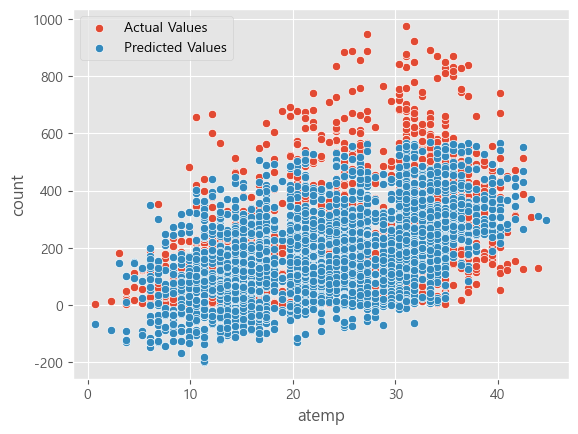

In [65]:
sns.scatterplot(x=X_test['atemp'], y=y_test, label='Actual Values')
sns.scatterplot(x=X_test['atemp'], y=pred, label='Predicted Values')

## 종속변수 로그변환

<Axes: >

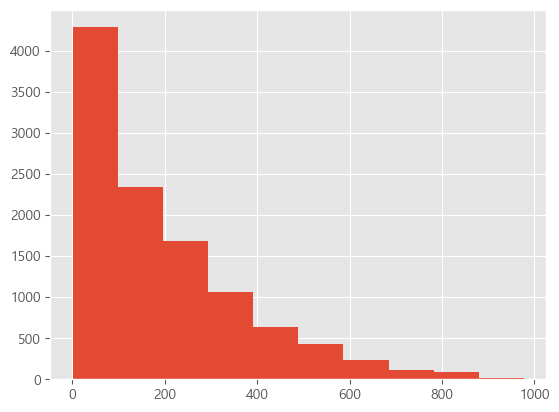

In [66]:
y.hist()

<Axes: xlabel='count', ylabel='Count'>

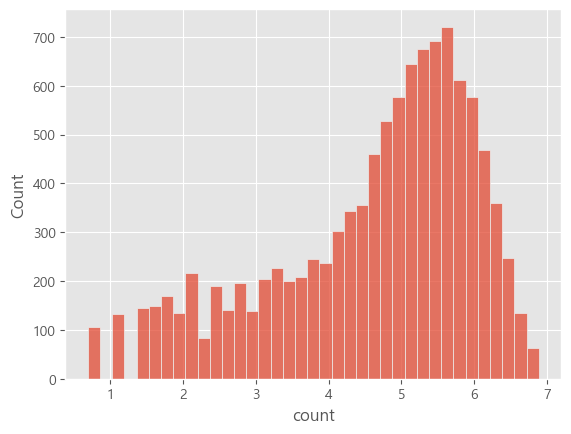

In [68]:
# 변수 선택
X = df.drop(['datetime','temp','casual','registered','count'], axis=1).copy()
y = df['count']

# 범주형변수 원핫인코딩
X_ohe = pd.get_dummies(X, columns=['year','month','hour','dayofweek','day','season','weather'])

# 종속변수 로그변환
y_log = np.log1p(y)
sns.histplot(y_log) # y_log.hist()

In [69]:
# 훈련세트/테스트세트 변환
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y_log, random_state=42)

# 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# 모델 성능 평가
pred = model.predict(X_test)

# 로그 역변환 
pred_original = np.expm1(pred)
y_test_original = np.expm1(y_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
mae = mean_absolute_error(y_test_original, pred_original)
mse = mean_squared_error(y_test_original, pred_original)
rmse = root_mean_squared_error(y_test_original, pred_original)
r2 = r2_score(y_test_original, pred_original)

print(f"MAE\t: {mae}")
print(f"MSE\t: {mse}")
print(f"RMSE\t: {rmse}")
print(f"R2\t: {r2}")

MAE	: 62.41411343825878
MSE	: 9182.72111277397
RMSE	: 95.82651570820036
R2	: 0.7201587769744492


In [ ]:
#종속변수 로그변환
y_log=np.log1p(y)
y_log.hist()

# 로그 역변환
pred_original = np.expm1(pred)
y_test_original = np.expm1(y_test)

## cross validation

In [70]:
model = LinearRegression() # 앞의 model은 이미 생성이 됐으므로 새로 선형회귀 모델 생성해주기

from sklearn.model_selection import cross_val_score, KFold # cross~ : 함수 / KFold : 클래스

# KFole 객세 생성
kf = KFold(n_splits=5, shuffle=True, random_state=42) # 함수 적용전에 클래스를 먼저 생성해주는 것
# k번 반복 측정한 결과를 평균 낸 값을 검증 결과값으로 사용
print(cross_val_score(model, X, y, scoring='r2', cv=kf ).mean()) # 아무 전처리도 하지 않은 X, y
print(cross_val_score(model, X_ohe, y, scoring='r2', cv=kf ).mean()) # 원핫인코딩 X
print(cross_val_score(model, X_ohe, y_log, scoring='r2', cv=kf ).mean()) # 원핫인코딩 X, 로그 y
print(cross_val_score(model, X, y_log, scoring='r2', cv=kf ).mean()) # 로그 y

0.3877043694112919
0.6904370042224031
0.8317721575045656
0.48576195811118456


# 다른 모델과 비교

In [71]:
# K-최근접이웃
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(cross_val_score(model, X, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y_log, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X, y_log, scoring='r2', cv=kf ).mean())

0.5479108832500819
0.2857084307163759
0.2804218170375753
0.6563442821767372


In [72]:
# DecisionTree(의사결정트리)
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(cross_val_score(model, X, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y_log, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X, y_log, scoring='r2', cv=kf ).mean())


0.8972769230028614
0.8447322391464148
0.8984482945082597
0.9051298621755931


In [73]:
# 랜덤포레스트 # 오래걸리는군... 앙상블이라서?
# 빅분기 볼 때 아묻따 랜덤포레스트 쓰는 편. 정확도가 높다는 것 같다
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=5, shuffle=True, random_state=42)

print(cross_val_score(model, X, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X_ohe, y_log, scoring='r2', cv=kf ).mean())
print(cross_val_score(model, X, y_log, scoring='r2', cv=kf ).mean())

0.9517151620078439
0.9225327847927719
0.9462881148423687
0.9543604311337053
